In [1]:
import glob
import ast
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Time taken by each Optimization Technique for the training of model

In [2]:
# combine the dataframe
#frames = [ process_frame(f) for f in file ]
frame1 = pd.read_csv('/content/drive/My Drive/project_results/Workbook_hyperopt.csv')
frame2 = pd.read_csv('/content/drive/My Drive/project_results/workbook_optuna.csv')
frame3 = pd.read_csv('/content/drive/My Drive/project_results/workbook_randomsearch.csv')
frames = [frame1, frame2, frame3]
result = pd.concat(frames)
result = result.reset_index().drop('index', axis = 1)
result

,seed,Algo,opt_time,train_time,PR_AUC,ROC_AUC,precision,recall,f1_score,best_f1_score,threshold,optim_type
0,1,XGBoost,21.17,22.8200,0.77,0.96,0.329758,0.866197,0.477669,0.81343,0.974,hyperopt
1,1,Catboost,5.45,2.4900,0.65,0.96,0.075832,0.866197,0.139456,0.75486,0.880,hyperopt
2,1,LGBM,11.57,9.2400,0.74,0.94,0.606557,0.781690,0.683077,0.63291,0.999,hyperopt
3,5,XGBoost,26.20,36.5300,0.75,0.97,0.805970,0.760563,0.782608,NaN,NaN,hyperopt
4,5,Catboost,5.63,1.5600,0.71,0.96,0.062790,0.859155,0.117026,0.76580,0.901,hyperopt
...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,XGBoost,25.27,7.0900,0.79,0.97,0.719745,0.795775,0.755853,0.80899,0.982,random_search
91,2,XGBoost,24.53,11.2500,0.79,0.97,0.530702,0.852113,0.654054,0.81203,0.984,random_search
92,3,XGBoost,25.85,38.0200,0.81,0.97,0.786207,0.802817,0.794425,0.83333,0.987,random_search
93,4,XGBoost,25.28,0.0048,0.80,0.97,0.746753,0.809859,0.777027,0.81159,0.891,random_search


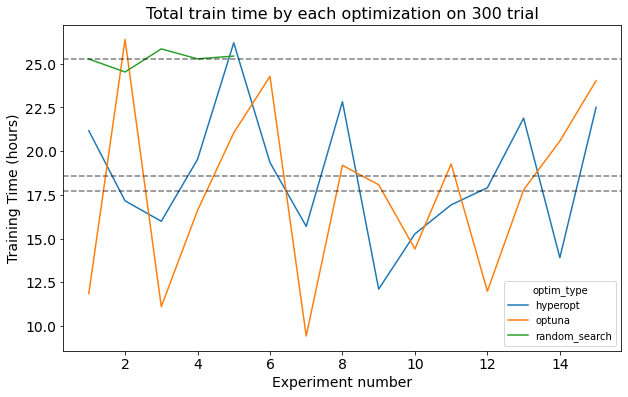

In [3]:
# train time on 300 trials
(result[result['Algo']=='XGBoost'].groupby(['seed','optim_type']).sum().unstack()['opt_time']).plot(figsize=(10,6))
for l in np.mean(result[result['Algo']=='XGBoost'].groupby(['seed','optim_type']).sum().unstack()['opt_time']):
    plt.axhline(l, color = 'k', linestyle = '--', alpha = 0.5)
plt.title('Total train time by each optimization on 300 trial', size = 16)
plt.xlabel('Experiment number', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Training Time (hours)' , size=14)
plt.savefig("xgb_optim_time.png")
plt.show()

## Minimum loss achieved by each optimization

In [4]:
# load the file path for the resuls
file = glob.glob('/content/drive/My Drive/project_results/loss_csv_results/*/*')
print(file)

# adding experiment number using list comprehension
def process_frame(path):
    df = pd.read_csv(path)
    # extract  experiment number
    #df['experiment'] = int(re.search(r'xperiment(.*?)_xgb.csv', path).group(1))
    return df
# combine the dataframe
frames = [ process_frame(f) for f in file ]
result = pd.concat(frames)
result = result.reset_index().drop('index', axis = 1)
result

['/content/drive/My Drive/project_results/loss_csv_results/loss_csv_randomsearch/xgb_seed315_rs.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_randomsearch/xgb_seed345_rs.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_randomsearch/xgb_seed724_rs.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_randomsearch/xgb_seed727_rs.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_randomsearch/xgb_seed761_rs.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_hyperopt/xgb_seed47_hyp.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_hyperopt/xgb_seed108_hyp.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_hyperopt/xgb_seed259_hyp.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_hyperopt/xgb_seed263_hyp.csv', '/content/drive/My Drive/project_results/loss_csv_results/loss_csv_hyperopt/xgb_seed304_hyp.csv', '/con

,seed,loss,variance,params,estimators,iteration,eval_time (seconds),optim_type
0,1,0.392949,0.000165,"{'objective': 'binary:logistic', 'eval_metric'...",478,1,262.102565,random_search
1,1,0.189626,0.000217,"{'objective': 'binary:logistic', 'eval_metric'...",397,2,269.214039,random_search
2,1,0.419366,0.000182,"{'objective': 'binary:logistic', 'eval_metric'...",243,3,307.130615,random_search
3,1,0.325300,0.000049,"{'objective': 'binary:logistic', 'eval_metric'...",245,4,285.358088,random_search
4,1,0.375578,0.000261,"{'objective': 'binary:logistic', 'eval_metric'...",235,5,281.366911,random_search
...,...,...,...,...,...,...,...,...
10473,15,0.127944,NaN,"{'objective': 'binary:logistic', 'eval_metric'...",188,296,237.512489,optuna
10474,15,0.130281,NaN,"{'objective': 'binary:logistic', 'eval_metric'...",96,297,178.083100,optuna
10475,15,0.131928,NaN,"{'objective': 'binary:logistic', 'eval_metric'...",271,298,284.608426,optuna
10476,15,0.124731,NaN,"{'objective': 'binary:logistic', 'eval_metric'...",225,299,269.774715,optuna


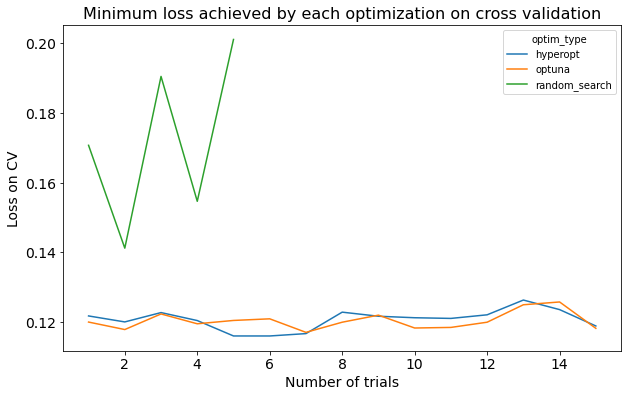

In [5]:

# Minimum Loss by each optimization technique
result.groupby(['seed','optim_type']).min().unstack()['loss'].plot(figsize=(10,6))
plt.title('Minimum loss achieved by each optimization on cross validation', size = 16)
plt.xlabel('Number of trials',size=14)
plt.ylabel('Loss on CV',size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("xgb_optim_min_loss.png")
plt.show()

# Loss distribution

In [6]:
result1 = result[['iteration','optim_type','loss','seed']].drop_duplicates(keep = 'first')

In [7]:
loss_xgb = result1.set_index(['iteration','seed','optim_type']).unstack().unstack().dropna(axis=1, how='all')
loss_xgb.head(10)

loss                      ...                                  
optim_type  hyperopt                      ... random_search                    
seed               1         2         3  ...             3         4         5
iteration                                 ...                                  
1           0.257498  0.135347  0.212801  ...      0.449311  0.452297  0.301718
2           0.148809  0.137195  0.139686  ...      0.315813  0.343688  0.242171
3           0.199702  0.132914  0.141920  ...      0.473380  0.175546  0.376686
4           0.227565  0.286272  0.172626  ...      0.331339  0.368799  0.355378
5           0.136937  0.137489  0.137814  ...      0.430500  0.400058  0.416885
6           0.158161  0.133958  0.141153  ...      0.483536  0.384506  0.481646
7           0.135313  0.334106  0.152581  ...      0.452312  0.385454  0.224449
8           0.127858  0.138826  0.223790  ...      0.418923  0.401675  0.369834
9           0.149017  0.230664  0.229380  ...      0.326983  0.499896  0.335429
10          0.377575  0.128831  0.243420  ...      0.224406  0.216935  0.410085

[10 rows x 35 columns]

<Figure size 720x288 with 0 Axes>

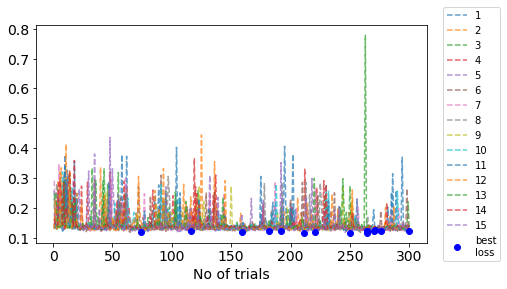

In [8]:
plt.figure(figsize= (10,4))
fig = loss_xgb['loss', 'hyperopt'].plot(figsize= (7,4), alpha = 0.7, style = "--")
plt.plot(loss_xgb['loss', 'hyperopt'].idxmin(),loss_xgb['loss', 'hyperopt'].min(), 'o',label='best\nloss',markersize=6, color="blue")
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("No of trials", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("xgb_hyperopt_loss.png", bbox_inches='tight')
plt.show()

In [9]:
pd.concat([loss_xgb['loss', 'hyperopt'].idxmin(),loss_xgb['loss', 'hyperopt'].min()], axis=1)

,0,1
seed,,
1,264,0.121713
2,159,0.119997
3,116,0.122679
4,221,0.120392
5,264,0.115968
6,211,0.115964
7,250,0.116644
8,182,0.122799
9,270,0.121628


<Figure size 1440x576 with 0 Axes>

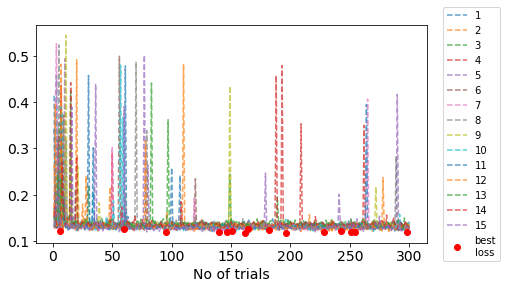

In [10]:
plt.figure(figsize= (20,8))
fig = loss_xgb['loss', 'optuna'].plot(figsize= (7,4), alpha = 0.7, style = "--")
plt.plot(loss_xgb['loss', 'optuna'][0:300].idxmin(),loss_xgb['loss', 'optuna'][0:300].min(), 'o',label='best\nloss', color = 'red',markersize=6)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("No of trials", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("xgb_optuna_loss.png", bbox_inches='tight')
plt.show()

In [ ]:
result_loss = result[['iteration','optim_type','loss','seed','eval_time (seconds)']].drop_duplicates(keep = 'first')
result_loss = result_loss.set_index(['iteration','seed','optim_type']).unstack().unstack()[0:300]
result_loss = result_loss.dropna(axis=1, how='all')
result_loss.head()

loss                      ... eval_time (seconds)                        
optim_type  hyperopt                      ...       random_search                        
seed               1         2         3  ...                   3           4           5
iteration                                 ...                                            
1           0.257498  0.135347  0.212801  ...          399.634731  463.828677  351.431384
2           0.148809  0.137195  0.139686  ...          167.587645  215.452840  318.337947
3           0.199702  0.132914  0.141920  ...          249.785968  475.306872  305.569367
4           0.227565  0.286272  0.172626  ...          614.867879  458.403777  173.726730
5           0.136937  0.137489  0.137814  ...          163.657570  373.939839  190.860622

[5 rows x 70 columns]

In [ ]:
min_loss = result_loss['loss','hyperopt'].idxmin()
min_loss

seed
1     264
2     159
3     116
4     221
5     264
6     211
7     250
8     182
9     270
10    264
11    300
12    276
13    271
14    192
15     74
dtype: int64

In [ ]:
sum_low = []
for exp, lowest_time in zip(min_loss.index, min_loss.values):
    sum_low.append(result_loss['eval_time (seconds)','hyperopt',exp][:lowest_time].sum())
sum_low = [x / 3600 for x in sum_low]
sum_low

[18.51698529354722,
 9.740421210972224,
 6.587340248411111,
 14.209992931338888,
 23.744034205558332,
 13.453290253108333,
 13.870073706016667,
 13.915022314172221,
 10.961563677947222,
 13.385742474177778,
 16.93123394038611,
 16.602745140619444,
 19.84805415055556,
 8.906266041869443,
 4.151737844694445]

In [ ]:
min_loss_opt = result_loss['loss','optuna'].idxmin()
#min_loss_opt
sum_low_opt = []
for exp, lowest_time in zip(min_loss_opt.index, min_loss_opt.values):
    sum_low_opt.append(result_loss['eval_time (seconds)','optuna',exp][:lowest_time].sum())
sum_low_opt = [x / 3600 for x in sum_low_opt]
sum_low_opt

[9.976486788208334,
 16.885996063666664,
 7.424757512236112,
 7.844611892452777,
 10.702202792333333,
 19.784722595744444,
 5.438976917624999,
 9.352919502305555,
 0.32716279275277776,
 14.318528257144441,
 6.139125296469444,
 10.09064174763889,
 3.4622091112027773,
 11.308448867516663,
 17.959299009819443]

In [ ]:
# error
min_loss_rand = result_loss['loss','random_search'].idxmin()

sum_low_rand = []
for exp, lowest_time in zip(min_loss_rand.index, min_loss_rand.values):
    sum_low_rand.append(result_loss['eval_time (seconds)','random_search',exp][:lowest_time].sum())
sum_low_rand = [x / 3600 for x in sum_low_rand]
sum_low_rand

[7.082005040888889,
 7.374304871916666,
 18.406424933963887,
 4.326798837861111,
 15.99462200161111]

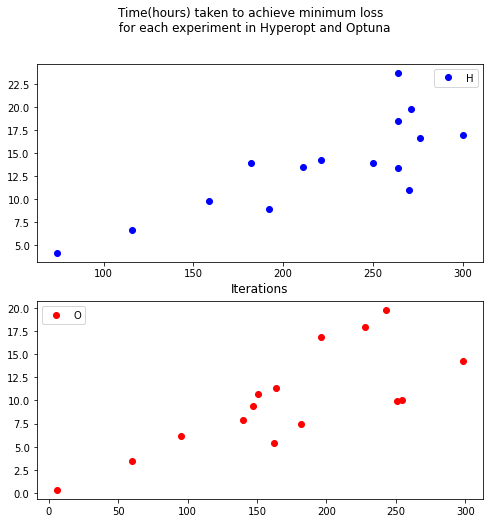

In [ ]:
fig,axs = plt.subplots(2,1, figsize = (8,8))
ax1 = plt.subplot(211)
ax1 = plt.plot(min_loss, sum_low, "bo", color = "blue")
plt.suptitle("Time(hours) taken to achieve minimum loss \n for each experiment in Hyperopt and Optuna")
plt.legend("Hyperopt")
plt.xlabel('Iterations', size = 12)
ax2 = plt.subplot(212)
ax2 = plt.plot(min_loss_opt, sum_low_opt, "o", color = "red")
plt.legend("OPtuna", loc = "upper left")
plt.savefig("time_vs_best_loss.png")

Normality Test

In [ ]:
import rpy2
# automatic translation of pandas to R
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
# install R packages
%%R 
install.packages("pROC")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘plyr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [ ]:
%%R 
install.packages("ggpubr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.56.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 188501 bytes (184 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [ ]:
%%R
install.packages("fBasics")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/timeDate_3043.102.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 314656 bytes (307 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [ ]:
import pandas as pd
results = pd.read_csv('/content/drive/My Drive/project_results/workbook_optuna.csv')
results

,num,seed,Algo,opt_time,train_time,PR_AUC,ROC_AUC,precision,recall,f1_score,best_f1_score,threshold
0,1,47,XGBoost,11.86,2.45,0.67,0.97,0.466387,0.781690,0.584211,0.78788,0.844
1,1,47,Catboost,5.69,1.31,0.66,0.96,0.077116,0.866197,0.141623,0.76404,0.922
2,1,47,LGBM,1.98,1.38,0.81,0.97,0.938596,0.753521,0.835938,0.84252,0.594
3,2,108,XGBoost,26.39,30.59,0.78,0.97,0.345609,0.859155,0.492929,0.81481,0.960
4,2,108,Catboost,5.60,5.26,0.70,0.96,0.072490,0.859155,0.133699,0.76119,0.912
5,2,108,LGBM,2.07,0.75,0.78,0.97,0.937500,0.739437,0.826772,0.83004,0.502
6,3,259,XGBoost,11.11,6.16,0.79,0.96,0.801418,0.795775,0.798587,0.83721,0.904
7,3,259,Catboost,5.29,7.06,0.64,0.96,0.068908,0.866197,0.127660,0.75781,0.966
8,3,259,LGBM,2.53,2.80,0.82,0.97,0.947368,0.760563,0.843750,0.84825,0.394
9,4,263,XGBoost,16.61,11.58,0.76,0.97,0.386885,0.830986,0.527964,0.80451,0.899


In [ ]:
# Convert Pandas dataframe to R dataframe
%%R -i results
head(results)
xgb <- results[results$Algo == "XGBoost",]
lgb <- results[results$Algo == "LGBM",]
ctb <- results[results$Algo == "Catboost",]
head(lgb)

   num seed Algo opt_time train_time PR_AUC ROC_AUC precision    recall
2    1   47 LGBM     1.98       1.38   0.81    0.97 0.9385965 0.7535211
5    2  108 LGBM     2.07       0.75   0.78    0.97 0.9375000 0.7394366
8    3  259 LGBM     2.53       2.80   0.82    0.97 0.9473684 0.7605634
11   4  263 LGBM     2.47       2.13   0.81    0.97 0.9469027 0.7535211
14   5  304 LGBM     2.53       2.44   0.82    0.97 0.9469027 0.7535211
17   6  315 LGBM     2.65       2.61   0.82    0.97 0.9473684 0.7605634
    f1_score best_f1_score threshold
2  0.8359375       0.84252     0.594
5  0.8267717       0.83004     0.502
8  0.8437500       0.84825     0.394
11 0.8392157       0.84615     0.302
14 0.8392157       0.84047     0.413
17 0.8437500       0.84496     0.340


ROC AUC Normality Test

R[write to console]: Loading required package: ggplot2



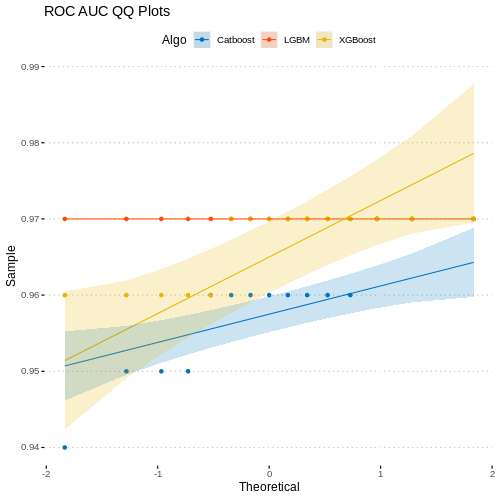

In [ ]:
%%R -w 500 -h 500
library("ggpubr")

ggqqplot(results, x = "ROC_AUC",
         title = "ROC AUC QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

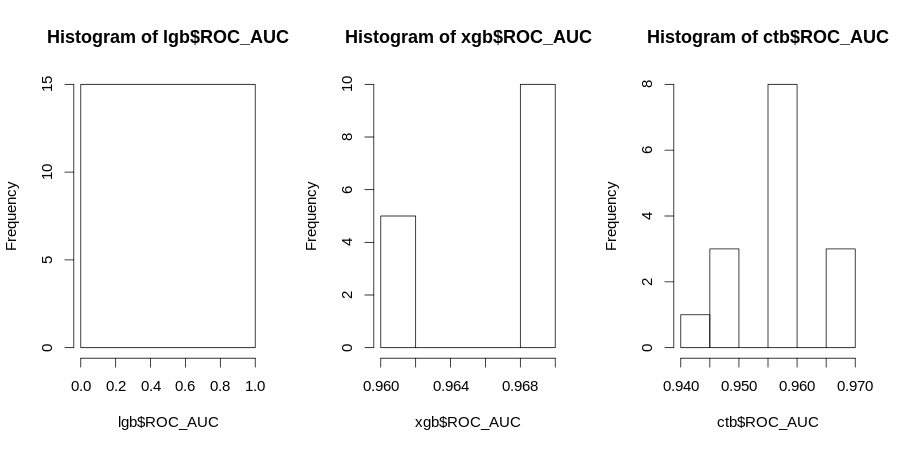

In [ ]:
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(lgb$ROC_AUC)
hist(xgb$ROC_AUC) 
hist(ctb$ROC_AUC)

In [ ]:
%%R
library("timeDate")
library("timeSeries")
library("fBasics")

In [ ]:
%%R
print("XGB ROC Normality")
print(shapiroTest(xgb$ROC_AUC))
print("CTB ROC Normality")
print(shapiroTest(ctb$ROC_AUC))
print("LGB ROC Normality")
print(shapiroTest(lgb$ROC_AUC))

[1] "XGB ROC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.6034
  P VALUE:
    2.738e-05 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "CTB ROC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.8596
  P VALUE:
    0.0238 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "LGB ROC Normality"


R[write to console]: Error in shapiro.test(x) : all 'x' values are identical
Calls: <Anonymous> ... withVisible -> print -> shapiroTest -> shapiro.test




Error in shapiro.test(x) : all 'x' values are identical
Calls: <Anonymous> ... withVisible -> print -> shapiroTest -> shapiro.test


As the p-value for xgb and ctb is less than 0.05, this implies data does not follow normal distribution

In [ ]:
%%R
print("XGB ROC Normality")
print(ksnormTest(xgb$ROC_AUC))
print("CTB ROC Normality")
print(ksnormTest(ctb$ROC_AUC))
print("LGB ROC Normality")
print(ksnormTest(lgb$ROC_AUC))

[1] "XGB ROC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.8315
  P VALUE:
    Alternative Two-Sided: 1.966e-09 
    Alternative      Less: 9.83e-10 
    Alternative   Greater: 0.4374 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "CTB ROC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.8264
  P VALUE:
    Alternative Two-Sided: 2.531e-09 
    Alternative      Less: 1.266e-09 
    Alternative   Greater: 0.4374 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "LGB ROC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.834
  P VALUE:
    Alternative Two-Sided: 1.735e-09 
    Alternative      Less: 8.674e-10 
    Alternative   Greater: 0.4374 

Description:
 Thu Aug  6 14:45:32 2020 by user: 



In [ ]:
%%R
print("XGB ROC Normality")
print(adTest(xgb$ROC_AUC))
print("CTB ROC Normality")
print(adTest(ctb$ROC_AUC))
print("LGB ROC Normality")
print(adTest(lgb$ROC_AUC))

[1] "XGB ROC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 2.9417
  P VALUE:
    8.114e-08 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB ROC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 1.0673
  P VALUE:
    0.00585 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB ROC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: Inf
  P VALUE:
    < 2.2e-16 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



PR AUC Normality Test

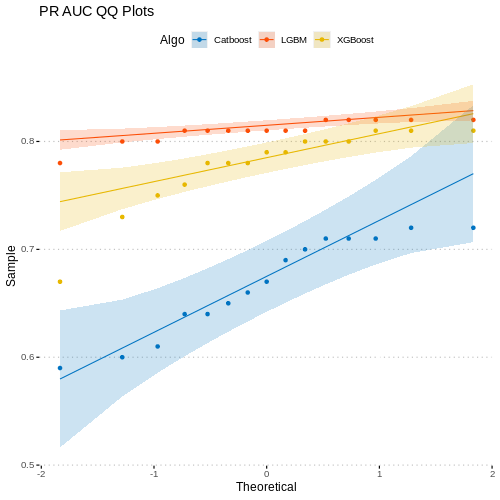

In [ ]:
%%R -w 500 -h 500
ggqqplot(results, x = "PR_AUC",
         title = "PR AUC QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

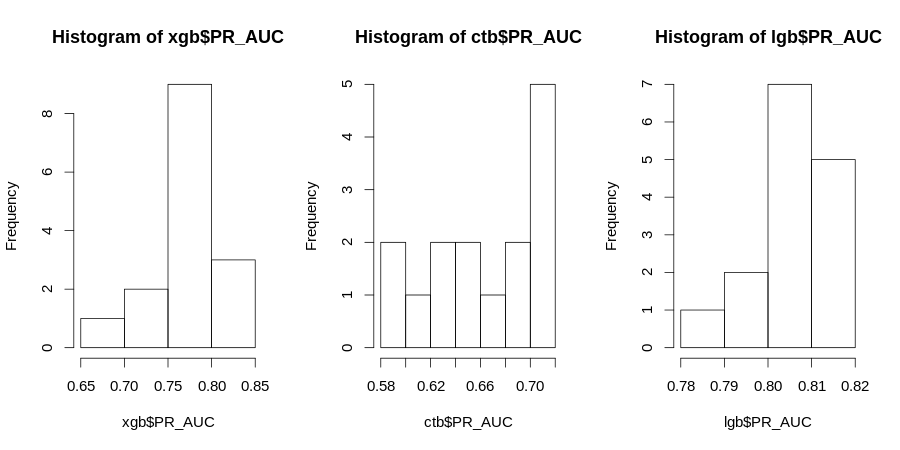

In [ ]:
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(xgb$PR_AUC) 
hist(ctb$PR_AUC)
hist(lgb$PR_AUC)

In [ ]:
%%R
print("XGB PR AUC Normality")
print(ksnormTest(xgb$PR_AUC))
print("CTB PR AUC Normality")
print(ksnormTest(ctb$PR_AUC))
print("LGB PR AUC Normality")
print(ksnormTest(lgb$PR_AUC))

[1] "XGB PR AUC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7486
  P VALUE:
    Alternative Two-Sided: 1e-07 
    Alternative      Less: 5.002e-08 
    Alternative   Greater: 0.2698 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB PR AUC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7224
  P VALUE:
    Alternative Two-Sided: 3.175e-07 
    Alternative      Less: 1.587e-07 
    Alternative   Greater: 0.1887 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB PR AUC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7823
  P VALUE:
    Alternative Two-Sided: 2.125e-08 
    Alternative      Less: 1.063e-08 
    Alternative   Greater: 0.2796 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



In [ ]:
# Darling Normality Test
%%R
print("XGB PR AUC Normality")
print(adTest(xgb$PR_AUC))
print("CTB PR AUC Normality")
print(adTest(ctb$PR_AUC))
print("LGB PR AUC Normality")
print(adTest(lgb$PR_AUC))

[1] "XGB PR AUC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 1.0401
  P VALUE:
    0.00689 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB PR AUC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.5048
  P VALUE:
    0.1708 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB PR AUC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 1.2123
  P VALUE:
    0.002449 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



In [ ]:
%%R
print("XGB PR AUC Normality")
print(shapiroTest(xgb$PR_AUC))
print("CTB PR AUC Normality")
print(shapiroTest(ctb$PR_AUC))
print("LGB PR AUC Normality")
print(shapiroTest(lgb$PR_AUC))

[1] "XGB PR AUC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.7972
  P VALUE:
    0.003381 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB PR AUC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9054
  P VALUE:
    0.1151 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB PR AUC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.7846
  P VALUE:
    0.002346 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



F1 Score Normality Test

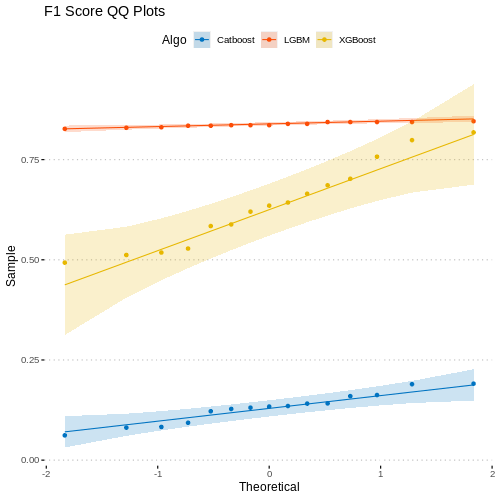

In [ ]:
%%R -w 500 -h 500
ggqqplot(results, x = "f1_score",
         title = "F1 Score QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

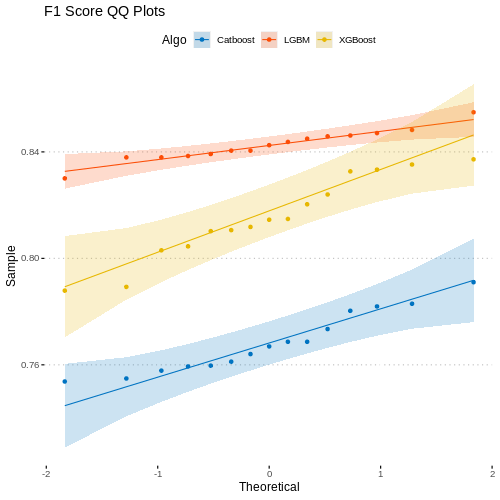

In [ ]:
# with best F1
%%R -w 500 -h 500
ggqqplot(results, x = "best_f1_score",
         title = "F1 Score QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

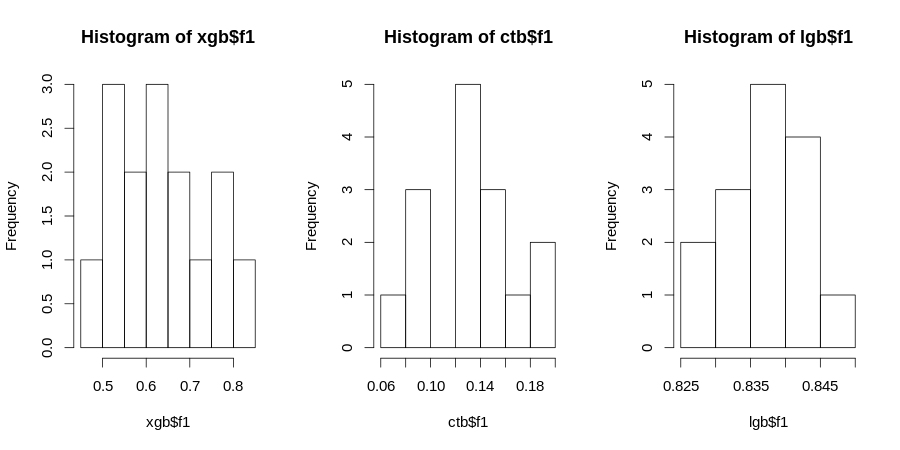

In [ ]:
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(xgb$f1) 
hist(ctb$f1)
hist(lgb$f1)

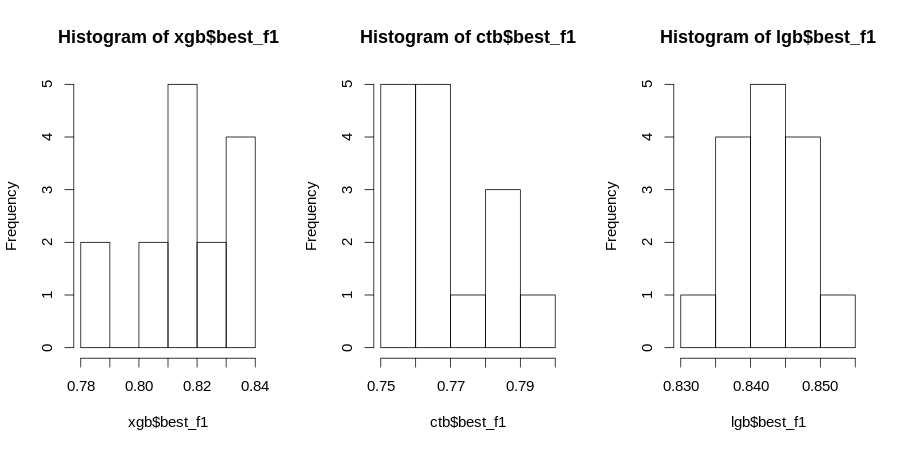

In [ ]:
# best F1
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(xgb$best_f1) 
hist(ctb$best_f1)
hist(lgb$best_f1)

In [ ]:
%%R
print("XGB F1 Normality")
print(ksnormTest(xgb$f1))
print("CTB F1 Normality")
print(ksnormTest(ctb$f1))
print("LGB F1 Normality")
print(ksnormTest(lgb$f1))

[1] "XGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.689
  P VALUE:
    Alternative Two-Sided: 1.28e-07 
    Alternative      Less: 6.399e-08 
    Alternative   Greater: 0.2433 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.5246
  P VALUE:
    Alternative Two-Sided: 0.0002262 
    Alternative      Less: 0.0001131 
    Alternative   Greater: 0.002879 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7958
  P VALUE:
    Alternative Two-Sided: 1.121e-08 
    Alternative      Less: 5.604e-09 
    Alternative   Greater: 0.3055 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
# with best F1
%%R
print("XGB F1 Normality")
print(ksnormTest(xgb$best_f1))
print("CTB F1 Normality")
print(ksnormTest(ctb$best_f1))
print("LGB F1 Normality")
print(ksnormTest(lgb$best_f1))

[1] "XGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7846
  P VALUE:
    Alternative Two-Sided: 2.612e-10 
    Alternative      Less: 1.306e-10 
    Alternative   Greater: 0.2612 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7745
  P VALUE:
    Alternative Two-Sided: 3.061e-08 
    Alternative      Less: 1.53e-08 
    Alternative   Greater: 0.2516 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7967
  P VALUE:
    Alternative Two-Sided: 1.072e-08 
    Alternative      Less: 5.362e-09 
    Alternative   Greater: 0.3147 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
%%R
print("XGB F1 Normality")
print(adTest(xgb$f1))
print("CTB F1 Normality")
print(adTest(ctb$f1))
print("LGB F1 Normality")
print(adTest(lgb$f1))

[1] "XGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.2365
  P VALUE:
    0.7424 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.3244
  P VALUE:
    0.4884 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.44
  P VALUE:
    0.2521 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
# with best_f1
%%R
print("XGB F1 Normality")
print(adTest(xgb$best_f1))
print("CTB F1 Normality")
print(adTest(ctb$best_f1))
print("LGB F1 Normality")
print(adTest(lgb$best_f1))

[1] "XGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.3032
  P VALUE:
    0.53 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.397
  P VALUE:
    0.3238 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.275
  P VALUE:
    0.6079 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
%%R
print("XGB F1 Normality")
print(shapiroTest(xgb$f1))
print("CTB F1 Normality")
print(shapiroTest(ctb$f1))
print("LGB F1 Normality")
print(shapiroTest(lgb$f1))

[1] "XGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9512
  P VALUE:
    0.544 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9536
  P VALUE:
    0.5828 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.932
  P VALUE:
    0.292 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
# with best_F1
%%R
print("XGB F1 Normality")
print(shapiroTest(xgb$best_f1))
print("CTB F1 Normality")
print(shapiroTest(ctb$best_f1))
print("LGB F1 Normality")
print(shapiroTest(lgb$best_f1))

[1] "XGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9427
  P VALUE:
    0.4177 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9334
  P VALUE:
    0.307 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9673
  P VALUE:
    0.8168 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



Non-Parametric Test

In [ ]:
%%R
print(kruskal.test(ROC_AUC ~ Algo, data = results) )
print(kruskal.test(PR_AUC ~ Algo, data = results) )
print(kruskal.test(f1_score ~ Algo, data = results) )


	Kruskal-Wallis rank sum test

data:  ROC_AUC by Algo
Kruskal-Wallis chi-squared = 21.104, df = 2, p-value = 2.615e-05


	Kruskal-Wallis rank sum test

data:  PR_AUC by Algo
Kruskal-Wallis chi-squared = 33.805, df = 2, p-value = 4.565e-08


	Kruskal-Wallis rank sum test

data:  f1_score by Algo
Kruskal-Wallis chi-squared = 39.172, df = 2, p-value = 3.119e-09



In [ ]:
# with best_F1
%%R
print(kruskal.test(ROC_AUC ~ Algo, data = results) )
print(kruskal.test(PR_AUC ~ Algo, data = results) )
print(kruskal.test(best_f1_score ~ Algo, data = results) )


	Kruskal-Wallis rank sum test

data:  ROC_AUC by Algo
Kruskal-Wallis chi-squared = 21.104, df = 2, p-value = 2.615e-05


	Kruskal-Wallis rank sum test

data:  PR_AUC by Algo
Kruskal-Wallis chi-squared = 33.805, df = 2, p-value = 4.565e-08


	Kruskal-Wallis rank sum test

data:  best_f1_score by Algo
Kruskal-Wallis chi-squared = 38.104, df = 2, p-value = 5.32e-09



In [ ]:
%%R
rank(results$ROC.AUC)
print(wilcox.test(xgb$ROC, lgb$ROC, alternative = "two.sided"))
print(wilcox.test(xgb$ROC, ctb$ROC, alternative = "two.sided"))
print(wilcox.test(ctb$ROC, lgb$ROC, alternative = "two.sided"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and lgb$ROC
W = 75, p-value = 0.01749
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and ctb$ROC
W = 175, p-value = 0.004944
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  ctb$ROC and lgb$ROC
W = 22.5, p-value = 2.188e-05
alternative hypothesis: true location shift is not equal to 0



In [ ]:
%%R
print(wilcox.test(xgb$ROC, lgb$ROC, alternative = "less"))
print(wilcox.test(xgb$ROC, ctb$ROC, alternative = "less"))
print(wilcox.test(ctb$ROC, lgb$ROC, alternative = "less"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and lgb$ROC
W = 75, p-value = 0.008746
alternative hypothesis: true location shift is less than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and ctb$ROC
W = 175, p-value = 0.9979
alternative hypothesis: true location shift is less than 0


	Wilcoxon rank sum test with continuity correction

data:  ctb$ROC and lgb$ROC
W = 22.5, p-value = 1.094e-05
alternative hypothesis: true location shift is less than 0



In [ ]:
%%R
print(wilcox.test(xgb$ROC, lgb$ROC, alternative = "greater"))
print(wilcox.test(xgb$ROC, ctb$ROC, alternative = "greater"))
print(wilcox.test(lgb$ROC, ctb$ROC, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and lgb$ROC
W = 75, p-value = 0.9927
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and ctb$ROC
W = 175, p-value = 0.002472
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$ROC and ctb$ROC
W = 202.5, p-value = 1.094e-05
alternative hypothesis: true location shift is greater than 0



In [ ]:
%%R
print(wilcox.test(xgb$PR_AUC, lgb$PR_AUC, alternative = "greater"))
print(wilcox.test(xgb$PR_AUC, ctb$PR_AUC, alternative = "greater"))
print(wilcox.test(lgb$PR_AUC, ctb$PR_AUC, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and lgb$PR_AUC
W = 29, p-value = 0.9998
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and ctb$PR_AUC
W = 217.5, p-value = 6.991e-06
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$PR_AUC and ctb$PR_AUC
W = 225, p-value = 1.372e-06
alternative hypothesis: true location shift is greater than 0



In [ ]:
%%R
print(wilcox.test(xgb$PR_AUC, lgb$f1, alternative = "greater"))
print(wilcox.test(xgb$PR_AUC, ctb$f1, alternative = "greater"))
print(wilcox.test(lgb$PR_AUC, ctb$f1, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and lgb$f1
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and ctb$f1
W = 225, p-value = 1.641e-06
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$PR_AUC and ctb$f1
W = 225, p-value = 1.394e-06
alternative hypothesis: true location shift is greater than 0



In [ ]:
# with best_F1
%%R
print(wilcox.test(xgb$PR_AUC, lgb$best_f1, alternative = "greater"))
print(wilcox.test(xgb$PR_AUC, ctb$best_f1, alternative = "greater"))
print(wilcox.test(lgb$PR_AUC, ctb$best_f1, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and lgb$best_f1
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and ctb$best_f1
W = 156, p-value = 0.03702
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$PR_AUC and ctb$best_f1
W = 221, p-value = 3.106e-06
alternative hypothesis: true location shift is greater than 0



Comparing min. median and max

In [ ]:
%%R
algo <- c("Catboost", "LGBM", "XGBoost")
cols <- c("PR_AUC", "ROC_AUC")

for (c in cols){
    cat("Experiment seeds for ",c,"\n")
    for (a in algo){
        df <- results[results$Algo == a,]
        cat("\t\t",a, "\n")
        cat("min seed : ", with(df, which.min(df[,c])), "\t")
        cat("median seed : ", with(df, which.min(abs(df[,c] - median(df[,c])))), "\t")
        cat("max seed : ", with(df, which.max(df[,c])), "\n\n")
    }
}

Experiment seeds for  PR_AUC 
		 Catboost 
min seed :  5 	median seed :  13 	max seed :  8 

		 LGBM 
min seed :  2 	median seed :  1 	max seed :  3 

		 XGBoost 
min seed :  1 	median seed :  3 	max seed :  8 

Experiment seeds for  ROC_AUC 
		 Catboost 
min seed :  15 	median seed :  1 	max seed :  5 

		 LGBM 
min seed :  1 	median seed :  1 	max seed :  1 

		 XGBoost 
min seed :  3 	median seed :  1 	max seed :  1 



Kappa Coefficient

In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
x = results[results['Algo']=='XGBoost']['PR_AUC'].apply(lambda x: int(x*100))
l = results[results['Algo']=='LGBM']['PR_AUC'].apply(lambda x: int(x*100))
c = results[results['Algo']=='Catboost']['PR_AUC'].apply(lambda x: int(x*100))

print(cohen_kappa_score(x, l))
print(cohen_kappa_score(x, c))
print(cohen_kappa_score(c, l))

0.15384615384615385
-0.004464285714285587
0.0


In [ ]:
x

0     67
3     78
6     79
9     76
12    80
15    79
18    73
21    81
24    81
27    78
30    80
33    80
36    78
39    75
42    81
Name: PR_AUC, dtype: int64

# Moving Threshold

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import pickle
import csv

In [ ]:
testdata=pd.read_csv('/content/drive/My Drive/project_results/test.csv')
testdata

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
139330,83104.0,-1.684059,1.500809,0.759888,0.550576,0.232439,-0.043998,0.626440,-0.004514,-0.004855,1.376058,1.540308,0.693117,0.019787,0.130297,0.672786,-0.542340,-0.259041,0.050345,0.296603,0.252636,0.099876,0.702279,-0.194992,0.034693,-0.271951,-0.402507,-0.359649,-0.093177,19.45,0
86361,61199.0,-0.712760,0.946364,1.613294,-0.057937,0.307252,0.033698,0.842808,-0.082649,-0.286508,-0.691974,-1.424615,0.187289,0.729575,-0.393678,-0.360989,-0.210956,-0.257742,-0.347665,0.783205,0.043267,-0.209533,-0.489587,-0.374907,-0.405319,0.492170,0.339188,-0.107684,0.052013,31.35,0
94117,64741.0,1.194627,0.202019,0.148443,0.456065,-0.024289,-0.105957,-0.146632,0.140367,-0.109165,-0.137806,1.448209,0.552174,-0.475780,0.047778,0.741160,0.508925,-0.059739,-0.065391,-0.138696,-0.134548,-0.237956,-0.716717,0.114452,-0.366347,0.135195,0.129319,-0.014949,0.012339,0.89,0
123803,77071.0,1.191219,-0.686249,0.413138,0.261424,-0.634744,0.624022,-0.717510,0.123673,-0.737618,0.811951,-0.149693,0.699783,1.113520,-0.260753,-0.373348,-0.937595,-0.774998,2.225077,-0.413753,-0.297845,-0.214390,-0.138765,-0.283669,-0.835391,0.646958,-0.177545,0.063255,0.026668,83.50,0
126884,78136.0,0.807040,-1.845157,1.160044,-0.078988,-1.973917,0.492741,-1.211037,0.286344,0.606206,0.173870,-0.962828,-0.534526,-0.857532,-0.955275,-0.739601,0.405838,1.157364,-1.717754,0.532613,0.443070,0.253705,0.462592,-0.229476,0.129784,0.251871,-0.111874,0.038918,0.063682,250.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,44460.0,0.638047,-1.246874,-0.314736,-0.264836,-0.031902,1.266928,-0.033675,0.308927,-1.625736,0.589107,2.308017,1.328085,0.716657,0.606381,0.976724,-2.534300,0.937891,-0.991656,-2.003473,-0.045994,-0.403602,-1.210534,0.097523,-1.033980,-0.251935,0.220138,-0.018670,0.037997,279.90,0
274698,166166.0,2.027942,0.034329,-2.411462,0.160815,0.870687,-1.269340,0.984068,-0.611409,0.190407,-0.099633,-1.084891,0.559101,0.829303,0.679437,0.434459,-0.673921,-0.532389,-0.333971,0.210357,-0.069285,0.184379,0.603199,-0.225128,-0.659959,0.670756,-0.379132,-0.040148,-0.063864,70.00,0
269159,163558.0,2.030605,0.148455,-1.765004,0.556354,0.135904,-1.471860,0.228982,-0.333116,0.691840,-0.505593,-0.388708,-0.312587,-0.720657,-0.683783,1.034540,0.211524,0.573734,0.544761,-0.517835,-0.237780,0.192819,0.687191,-0.014358,-0.104785,0.211153,-0.096818,-0.004184,-0.029435,11.99,0
42212,40998.0,0.961080,-0.816486,1.540157,1.011783,-1.196358,1.353506,-1.253677,0.625705,1.655494,-0.363684,0.127790,1.105679,-0.845978,-0.795568,-1.888385,-0.442440,0.348403,-0.147016,0.444069,-0.079521,-0.015309,0.313640,-0.123588,-0.228378,0.305133,0.513930,0.053458,0.018343,59.50,0


In [ ]:
testlabel=testdata['Class']
testlabel

139330    0
86361     0
94117     0
123803    0
126884    0
         ..
50356     0
274698    0
269159    0
42212     0
36648     0
Name: Class, Length: 85118, dtype: int64

In [ ]:
#lgb proba optuna files
path = ['/content/drive/My Drive/project_results/predproba_lgb_optuna/Experiment1_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/Experiment2_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment3_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment4_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment5_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment6_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment7_preds.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment8_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment9_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment10_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment11_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment12_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment13_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment14_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment15_pred.p']

In [ ]:
#ctb proba optuna files
path = ['/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_47O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_108O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_259O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_263O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_304O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_315O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_345O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_524O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_647O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_724O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_727O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_761O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_789O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_920O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_992O.p']

In [ ]:
#xgb proba optuna files
path=['/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed47_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed108_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed259_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed263_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed304_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed315_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed345_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed524_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed647_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed724_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed727_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed761_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed789_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed920_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed992_predprob.p']

In [ ]:
#lgb hyperopt proba files
path=['/content/drive/My Drive/project_results/predproba_lgb_hyperopt/Experiment1_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/Experiment2_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment3_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment4_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment5_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment6_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment7_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment8_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment9_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment10_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment11_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment12_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment13_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment14_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment15_pred.p']

In [ ]:
# xgb proba hyperopt files
path = ['/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed47_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed108_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed259_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed263_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed304_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed315_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed345_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed524_predprob.p',
        #'/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed647_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_randomseed_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed727_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed761_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed789_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed920_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed992_predprob.p']

In [ ]:
# ctb hyperopt proba files
path = ['/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_47H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_647H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_524H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_304H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_108H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_992H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_920H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_761H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_259H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_789H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_724H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_727H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_263H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_315H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_345H.p']

In [ ]:
# xgb random search proba files
path = ['/content/drive/My Drive/project_results/xgb_randomsearch_results/seed315/xgb_seed315_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed345/xgb_seed345_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed724/xgb_seed724_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed727/xgb_seed727_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed761/xgb_seed761_rs_predprob.p']

In [ ]:
# xgb new hyperopt proba files
path = ['/content/drive/My Drive/project_results/new_hyperopt_results/seed345/xgb_seed345_hp_predprob.p',
        '/content/drive/My Drive/project_results/new_hyperopt_results/seed47/xgb_seed47_hp_predprob.p',
        '/content/drive/My Drive/project_results/new_hyperopt_results/seed727/xgb_seed727_hp_predprob.p',
        '/content/drive/My Drive/project_results/new_hyperopt_results/seed761/xgb_seed761_hp_predprob.p']

In [ ]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(prob, threshold):
	return (prob >= threshold).astype('int')

In [ ]:
for file_path in path:
  proba_file = open(file_path,'rb')
  proba = pickle.load(proba_file)
  #proba = proba[1:]
  # evaluate each threshold
  scores = [f1_score(testlabel, to_labels(proba, t)) for t in thresholds]
  # get best threshold
  ix = np.argmax(scores)
  print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.872, F-Score=0.83721
Threshold=0.974, F-Score=0.81343
Threshold=0.980, F-Score=0.80899
Threshold=0.806, F-Score=0.84825


In [ ]:
for afile in path:
  proba_file = open(afile,'rb')
  proba = pickle.load(proba_file)
  #proba = proba[1:]
  print(proba.shape)

(85118,)
